# Endmember Extraction in Python

**Author:** Ardra Charath

**Last Updated:** Nov 29, 2023

## Goal

The goal of this tutorial is to learn how to classify spectral remote sensing data using Endmember Extraction, such as for forest/vegetaion classification.

## Endmember Extraction

- Used in remote sensing and hyperspectral imaging to identify and isolate pure spectral signatures called endmembers
- Example Uses: Material identification, land cover classification, mineral mapping, and environmental monitoring

***Steps:***
1. Endmembers are extracted – aim to find the most spectrally pure pixels that represent the endmembers; Each endmember represents a material or substance present in the scene
2. Example Algorithms: N-FINDR (N-dimensional Feature Space Fitting), Vertex Component Analysis (VCA), and Pixel Purity Index (PPI)
3. The endmembers are stored in a library
4. Spectral Unmixing – estimate the proportion of each endmember in the mixed pixels of the hyperspectral image

## Data Set Used

The data set used in this tutorial consists of visible to shortwave infrared (VSWIR) imaging spectroscopy data collected from the International Space Station (ISS), which comes from the Earth Surface Mineral Dust Source Investigation (EMIT). It focuses on the Jack and Laura Dangermond Preserve in Santa Barbara County, California.

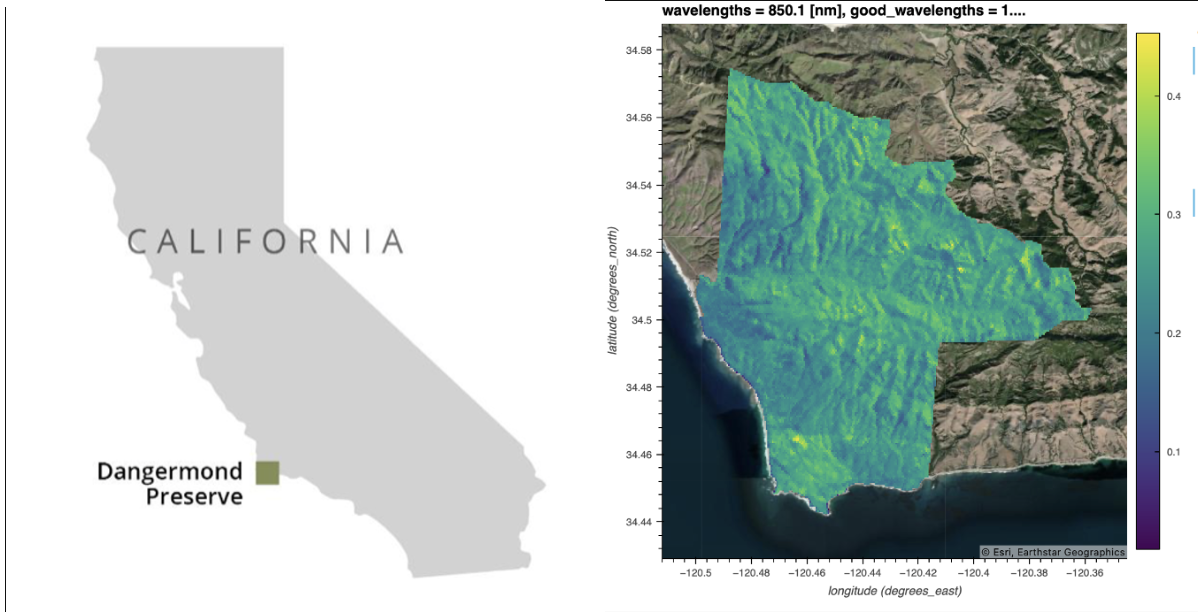

This data set was choosen because it already classifies the vegetation in the preserve, which serves as a good basis for comparison.

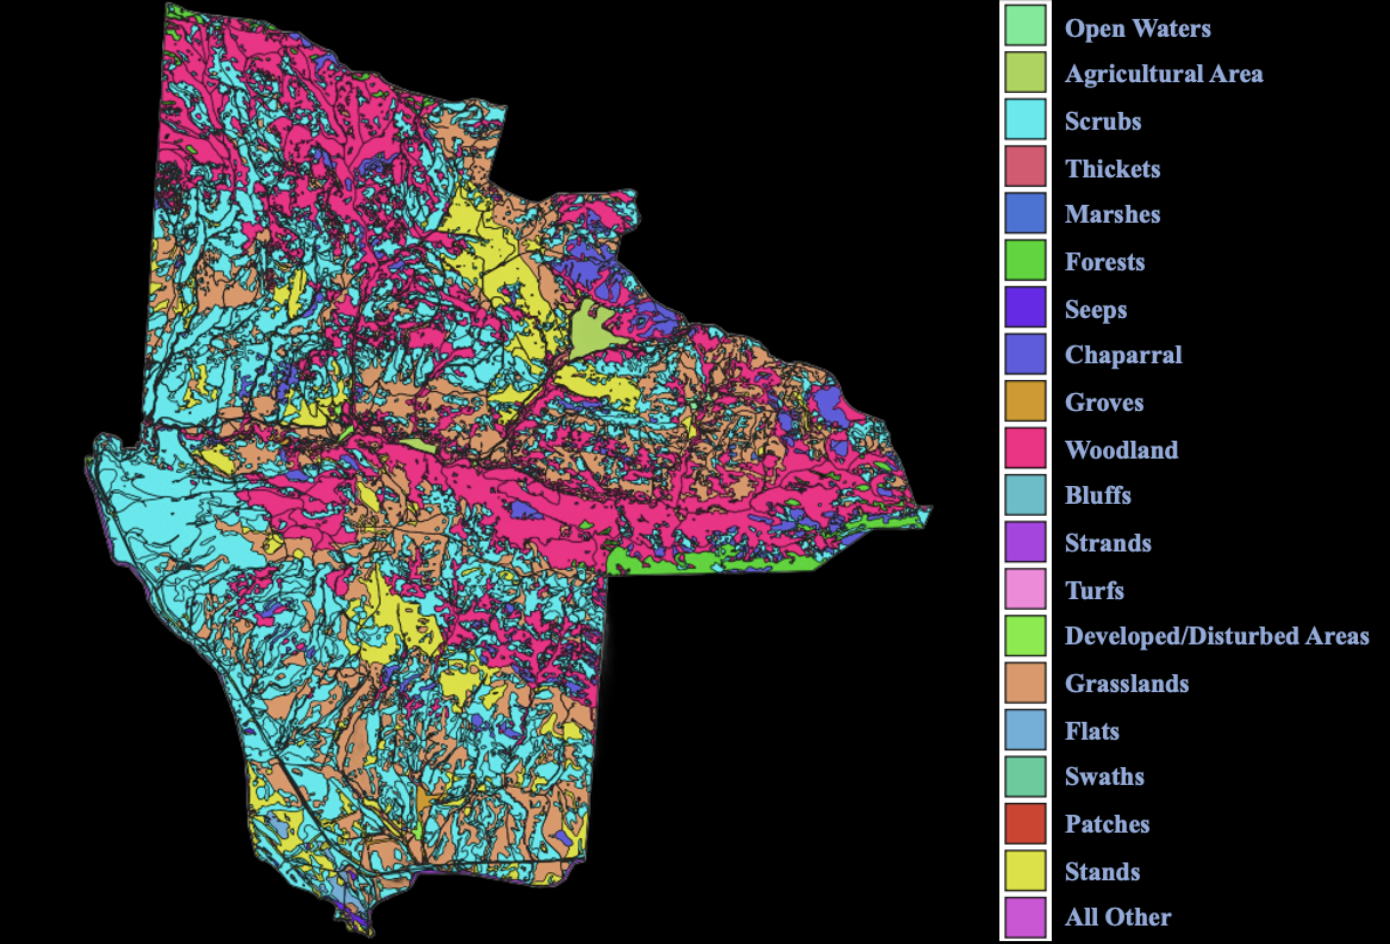

<strong>Open Waters</strong> <br>
<strong>Agricultural Area</strong> <br>
<strong>Scrubs</strong> - Purple Sage Scrub, Black Sage Scrub, Deer Weed Scrub, Coast buckwheat scrub, Coffeeberry Scrub, Menzie's Golden Bush Scrub, California Sagebrush Scrub, Giant Coreopsis Scrub, Long Leaf Bush Lupine Scrub, Bush Monkeyflower Scrub, Redberry Scrub, Lemonade Berry Scrub, Poison Oak Scrub, Silver Dune Lupine - Mock Heather Scrub, California Brittle Bush Scrub, Coyote Brush Scrub, Sawtooth Golden Bush Scrub, Silver Bush Lupine Scrub <br>
<strong>Thickets</strong> - Arroyo Willow Thickets <br>
<strong>Marshes</strong> - California Bulrush Marsh, Cattail Marshes, Baltic and Mexican Rush Marshes, & Western Rush Marshes <br>
<strong>Forests</strong> - Bishop Pine Forest & Tanoak Forest <br>
<strong>Seeps</strong> - Brownheaded Rush Seeps <br>
<strong>Chaparral</strong> - Holly Leaf Cherry Chaparral, La Purisima Manzanita Chaparral, Chamise Chaparral, Toyon Chaparral, & Buckbrush Ceanothus Chaparral <br>
<strong>Groves</strong> - Eucalyptus Groves & California Walnut Groves <br>
<strong>Woodland</strong> - Coast Live Oak Woodland <br>
<strong>Bluffs</strong> - Coastal Bluffs <br>
<strong>Strands</strong> - Coastal Strand <br>
<strong>Turfs</strong> - Creeping Ryegrass Turfs <br>
<strong>Developed/Disturbed Areas</strong> <br>
<strong>Grasslands</strong> - Non-native Grassland, Purple Needlegrass Grassland, & Giant Wild Rye Grassland <br>
<strong>Flats</strong> - Salt Grass Flats <br>
<strong>Swaths</strong> - Sand Dune Sedge Swaths <br>
<strong>Patches</strong> - Seaside Golden Yarrow Patches <br>
<strong>Stands</strong> - Semi-natural Herbaceous Stands, Semi-natural Stands, Monterey Cypress Stands, & Summer Holly Stands <br>
<strong>All Other</strong>

## Set Up and Data Acquisition

Import necessary libraries for data handling and processing

In [27]:
import earthaccess
import os
from osgeo import gdal
import numpy as np
import math
import rasterio as rio
import xarray as xr
import holoviews as hv
import hvplot.xarray
import netCDF4 as nc
import geopandas as gp
import sys
sys.path.append('/home/jovyan/EMIT-Data-Resources/python/modules/')
from emit_tools import emit_xarray
from spectral import *
import warnings
import h5py, os, copy
import matplotlib.pyplot as plt
import numpy as np
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt
import matplotlib.pyplot as plt
import pandas as pd

Suppress warnings for cleaner output (this step can be ignored).

In [28]:
warnings.filterwarnings('ignore')

Log into Earthdata for data access

In [29]:
earthaccess.login(persist=True)

We are already authenticated with NASA EDL


In [30]:
# URL for accessing the specific dataset for the tutorial
url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20230629T170449_2318011_002/EMIT_L2A_RFL_001_20230629T170449_2318011_002.nc'

In [31]:
# Initialize a session for downloading data using Earthdata login credentials
fs = earthaccess.get_fsspec_https_session()

# Extract the granule asset ID from the URL for file naming
granule_asset_id = url.split('/')[-1]

# Define the local file path for data storage
fp = f'../../data/{granule_asset_id}'
                  
# Download the data if it does not already exist locally
if not os.path.isfile(fp):
    fs.download(url, fp)

Load the dataset and apply orthorectification

In [32]:
ds_geo = emit_xarray(fp, ortho=True)

Read a shapefile to clip the dataset

In [33]:
shape = gp.read_file('/home/jovyan/EMIT-Data-Resources/python/tutorials/dangermond_boundary.shp')
img_sub = ds_geo.rio.clip(shape.geometry.values,shape.crs, all_touched=True)

In [34]:
# Zero-fill NA values
img_zero = img_sub.fillna(0)

## Endmember Extraction

### Technique 1: Using the NFINDR Algorithm

Perform endmember extraction using the NFINDR algorithm

In [35]:
ee = eea.NFINDR()


# The algorithm looks for 4 distinct spectral signatures, iterating a maximum of 5 times.
data = ee.extract(img_zero.reflectance.data,4,maxit=5,
               normalize=False,ATGP_init=True)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Display the extracted endmembers. This visualization helps in understanding the types of surfaces or materials present in the dataset.

In [39]:
ee.display(suffix='SERC')

AttributeError: 'NoneType' object has no attribute 'shape'

Interpretation for this specific graph in the provided data set:

<strong>EM1</strong> - Water <br>
<strong>EM2</strong> - Green vegetation (absorbs red, reflects green, also dips around 80 and 110, and has a lot of water) <br>
<strong>EM3</strong> - Soil/Pavement <br>
<strong>EM4</strong> - Dry vegetation/Non-photosynthetic vegetation/Soil cover; peak @ 250 <br>

Create and display abundance maps for each member. Shows the fractional components of each member.

In [40]:
am = amap.FCLS()
amaps = am.map(img_zero.reflectance.data,data,normalize=False)
am.display(colorMap='jet',columns=4,suffix='SERC')

NameError: name 'data' is not defined

Print the mean values of the abundance maps for each endmember.

In [41]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))

Abundance Map Mean Values:


NameError: name 'amaps' is not defined

Plot histograms for the abundance maps of each endmember.

NameError: name 'amaps' is not defined

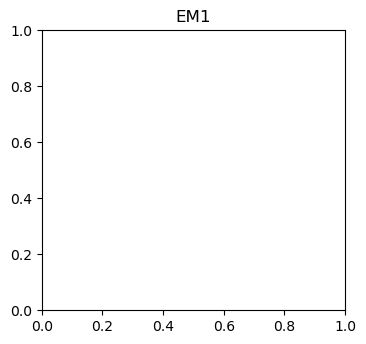

In [42]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,0.001]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,0.5]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,0.05]) 

### Technique 2: Using Pre-Selected Data Points

Load and process data

In [43]:
points = pd.read_csv('/home/jovyan/EMIT-Data-Resources/SURF/points_ardra.csv') 
points = points.set_index(['ID'])
points

,VegType,Longitude,Latitude
ID,,,
1,Non-native Grassland,-120.467624,34.474747
2,Coast Live Oak Wood,-120.458822,34.524358
3,Purple Sage Scrub,-120.460587,34.521746
4,Semi-natural Herbaceous Stands,-120.421021,34.521809
5,California Sagebrush Scrub,-120.490088,34.501094
6,Purple Sage Scrub,-120.488490,34.515931
7,Coyote Brush Scrub,-120.423033,34.489666


In [44]:
# convert points to an x_array type
xp = points.to_xarray()
xp

<xarray.Dataset>
Dimensions:    (ID: 7)
Coordinates:
  * ID         (ID) int64 1 2 3 4 5 6 7
Data variables:
    VegType    (ID) object 'Non-native Grassland' ... 'Coyote Brush Scrub'
    Longitude  (ID) float64 -120.5 -120.5 -120.5 -120.4 -120.5 -120.5 -120.4
    Latitude   (ID) float64 34.47 34.52 34.52 34.52 34.5 34.52 34.49

Extract data for the specified points from the dataset

In [46]:
extracted = img_sub.sel(latitude=xp.Latitude,longitude=xp.Longitude, method='nearest').to_dataframe()
extracted

fwhm  good_wavelengths   latitude   longitude        elev  \
wavelengths ID                                                               
381.005585  1   8.415               1.0  34.474549 -120.467804   36.348747   
            2   8.415               1.0  34.524434 -120.458586  218.984451   
            3   8.415               1.0  34.521723 -120.460755  165.853546   
            4   8.415               1.0  34.521723 -120.421172  138.781113   
            5   8.415               1.0  34.501118 -120.490036   58.156300   
...               ...               ...        ...         ...         ...   
2492.923828 3   8.809               1.0  34.521723 -120.460755  165.853546   
            4   8.809               1.0  34.521723 -120.421172  138.781113   
            5   8.809               1.0  34.501118 -120.490036   58.156300   
            6   8.809               1.0  34.515758 -120.488409   12.650021   
            7   8.809               1.0  34.489731 -120.422799  231.486496   

                spatial_ref  reflectance  
wavelengths ID                            
381.005585  1             0     0.052913  
            2             0     0.031653  
            3             0     0.047616  
            4             0     0.028446  
            5             0     0.077694  
...                     ...          ...  
2492.923828 3             0     0.088519  
            4             0     0.057554  
            5             0     0.092941  
            6             0     0.085381  
            7             0     0.046335  

[1995 rows x 7 columns]

In [47]:
final_data = []
temp_list = []
for reflectance in extracted["reflectance"]:
    if len(temp_list) == 285:
        final_data.append(temp_list)
        temp_list = []
    else:
        temp_list.append(reflectance)

In [48]:
data = np.array(final_data)
data[np.isnan(data)] = 0

Save the processed data to a CSV file

In [50]:
DF = pd.DataFrame(data)
DF.to_csv("reflectance_data2_ardra.csv")

Create and display abundance maps for each member. Shows the fractional components of each member.

In [53]:
am = amap.FCLS()
amaps = am.map(img_zero.reflectance.data,data,normalize=False)

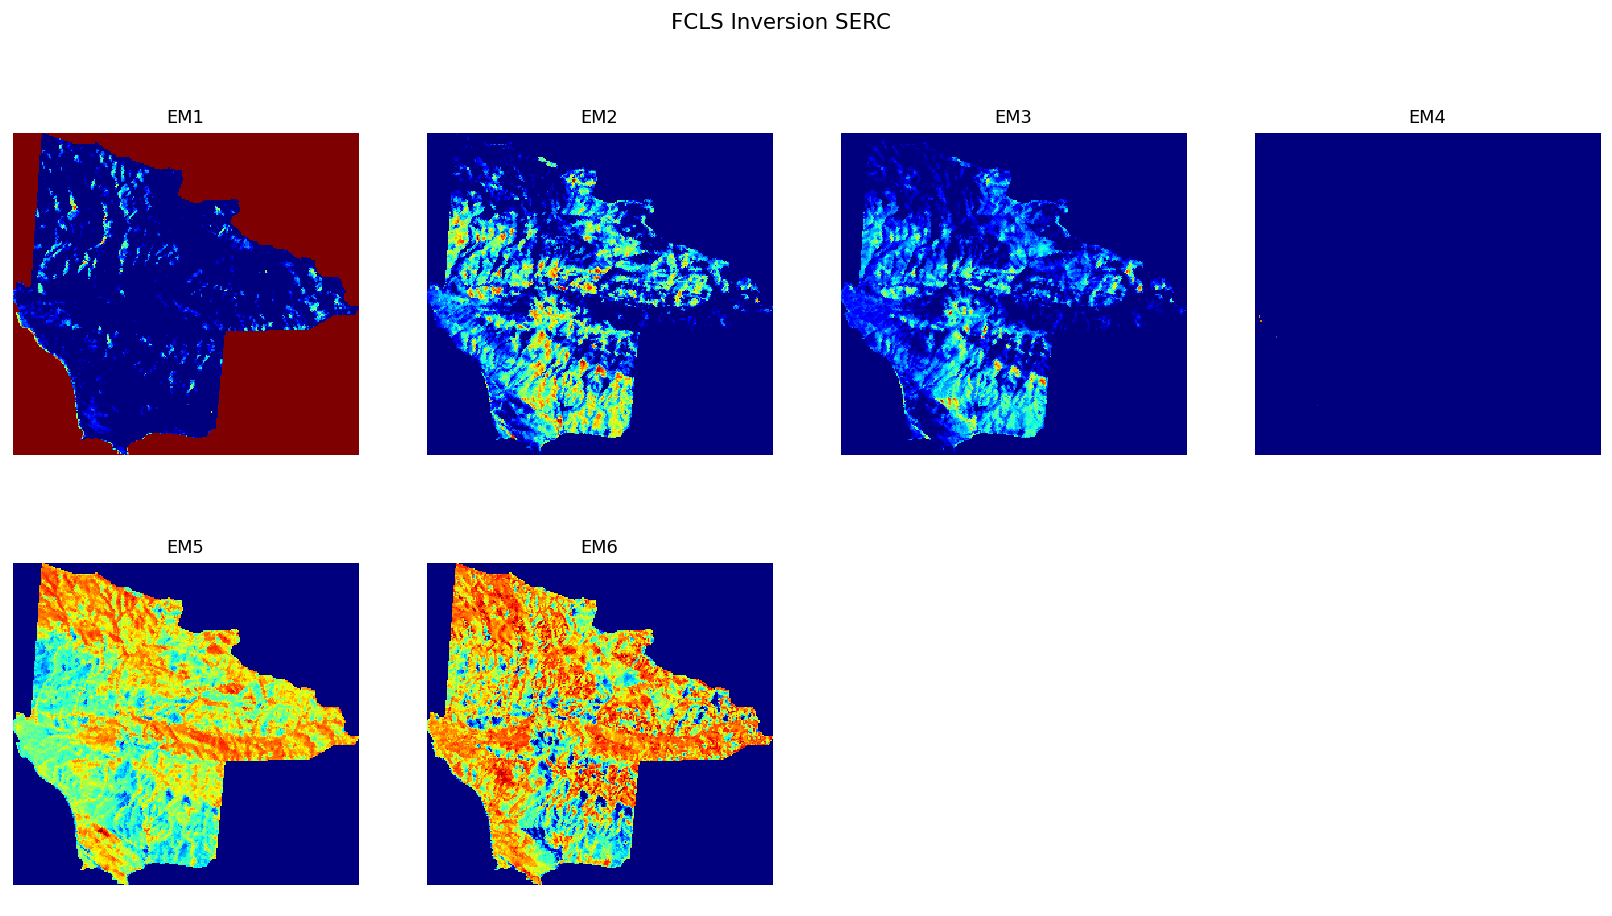

<Figure size 640x480 with 0 Axes>

In [54]:
am.display(colorMap='jet',columns=4,suffix='SERC')